# Análisis estadístico de asociación entre variables

**Autor:** Roberto P. Muñoz<br />
**Cargo:** Data Scientist en MetricArts<br />
**Github:** <https://github.com/rpmunoz>

En la sección anterior aprendimos cómo hacer un análisis descriptivo usando una sola variable. Para ello empleamos elementos estadísticos tales como tablas de frecuencia, medidas de localización y medidas de dispersión.

En esta sección aprenderemos cómo hacer un análisis estadístico de la asociación entre variables. Entendemos como asociación el análisis de relaciones, covarianza y correlación entre variables.

El análisis estadístico de la asociación entre variables representa una parte fundamental del análisis de datos, pues muchas de las preguntas e hipótesis que se plantean en los estudios implican analizar la existencia de relación entre variables.

## Análisis de asociación

La **existencia** de algún tipo de asociación entre dos o más variables representa la presencia de algún tipo de tendencia o patrón de emparejamiento entre los distintos valores de esas variables.

- Supongamos que tenemos una variable X que puede tomar los valores [a, b, c] y otra variable Y que puede tomar los valores [m, n, p]. Los datos empíricos indican que los sujetos que en X tienen valor **a** en Y tienden a tener valor **n**, que las que son **b** tienden a ser **p**, y que las que son **c** tienden a ser **m**. Esta evidencia pone de manifiesto que existe cierta asociación entre ambas variables.

Para visualizar esta situación, usamos las distribuciones de frecuencias de la variable Y para aquellos casos que en la variable X toma los valores **a**, **b** y **c**, respectivamente.

![optional caption text](figures/analisis asociacion positivo.jpg)


Complementariamente, se habla de **independencia** entre variables cuando no existe tal patrón de relación entre los valores de las mismas.

- Siguiendo el ejemplo anterior, sería el caso en que los sujetos que en X son **a**, en Y tienen una distribución que es igual o muy similar a la que tienen los que en X son **b** y **c**.

Para visualizar esta situación, usamos las distribuciones de frecuencias de la variable Y.

![optional caption text](figures/analisis asociacion independiente.jpg)

La asociación entre variables no debe entenderse como una cuestión de todo o nada, sino como un continuo que iría desde la ausencia de relación (independencia) al nivel máximo de relación entre las variables. Este grado máximo se plasmaría en una relación determinista, esto es, el caso en que a partir del valor de un sujeto cualquiera en una variable, se puede afirmar cual será su valor en la otra variable.

## Análisis usando Python

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 7.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

np.set_printoptions(precision=2)
%precision 2

'%.2f'

## Lectura de datos

En este tutorial usaremos una base de datos que contiene información con los precios de venta de 600 casas.

Los campos disponibles son la fecha en que fue vendida la casa, el precio en dólares americanos, el área útil en metros cuadrados, el área construida en metros cuadrados, el número de habitaciones, el número de baños, el número de pisos y el año en que fue construida.

In [4]:
casas_file='data/precios_casas.csv'
casas=pd.read_csv(casas_file)
casas.head()

,fecha,precio_USD,area_m2_util,area_m2_construida,habitaciones,baños,pisos,año_construida
0,2014-05-29,485000.0,148.6,399.5,4,1.00,1.5,1916
1,2015-03-04,570000.0,117.1,309.2,3,1.75,1.0,1905
2,2014-06-26,518500.0,147.7,102.4,3,3.50,3.0,2010
3,2014-06-13,822500.0,215.5,460.8,5,3.50,2.0,1926
4,2014-11-04,511000.0,132.9,321.0,3,1.00,1.0,1947


In [10]:
print("Número de casas: ", len(casas))
print("Número de habitaciones: ", sorted(casas['habitaciones'].unique()))

Número de casas:  602
Número de habitaciones:  [1, 2, 3, 4, 5, 6, 7, 9, 33]


En general, la manera más rapida de verificar si existe una relación entre variables es mediante el uso de visualizaciones. La visualización más empleada para este caso es el gráfico de puntos, el cual permite rápidamente ver la existencia de alguna relación.

Supongamos que queremos ver si existe alguna relación entre las variables **precio_USD** y **area_m2_util** del conjunto de datos **casas**. Para ello usamos la función plot.scatter() de la librería pandas.

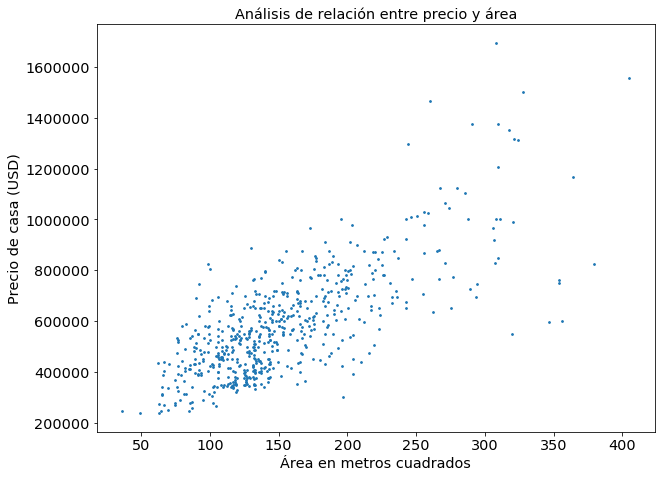

In [15]:
casas.plot.scatter(x='area_m2_util', y='precio_USD', s=3);
plt.xlabel('Área en metros cuadrados')
plt.ylabel('Precio de casa (USD)')
plt.title('Análisis de relación entre precio y área')

A continuación veremos cómo medir la asociación entre dos variables cuantitativas. Los índices más utilizados en estadística para analizar la intensidad o tamaño del efecto de la relación lineal entre dos variables son la **covarianza** y el **coeficiente de correlación lineal**.

## Covarianza

La covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal.

Dadas dos variables estadísticas x e y definiremos la covarianza $S_{xy}$ como:

$S_{xy} = \frac{1}{N} \sum_{i=1}^N (x_i - \overline{x}) (y_i - \overline{y})$